# 모델링 - baseline model  
  
- feature selection 성능 비교.
  1. lasso 회귀
  2. random forest  
  
lass 회귀 모형은 너무 정확도가 낮아서 random forest의 feature importance로 feature selection 수행. threshold는 0.001  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Commit_test_folder/LGAimers-06-2/src

/content/drive/MyDrive/Commit_test_folder/LGAimers-06-2/src


In [ ]:
import pandas as pd
import numpy as np
import lgAimersDPP as dpp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
pd.set_option('display.max_columns',None) # 전체 열 출력하기
dpp

<module 'lgAimersDPP' from '/content/drive/MyDrive/Commit_test_folder/LGAimers-06-2/src/lgAimersDPP.py'>

In [ ]:
train = pd.read_csv('data/train.csv')
train = dpp.dpp(train)
print(train.shape)
train.head()

(256351, 81)


,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부,난자 나이,정자 나이,isIVF,isICSI,isIUI,isICI,isGIFT,isFER,isGenericDI,isIVI,isBLASTOCYST,isAH,isUnknown,기증용 배아,난자 저장용 배아,배아 저장용 배아,연구용 배아,현재 시술용 배아
0,1,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,3.0,-1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,-1.0,1,0,-1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0,6,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,2.0,-1.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,3.0,-1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#lasso 회귀
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('임신 성공 여부', axis=1), train['임신 성공 여부'], test_size=0.2, random_state=42)

alphas = [0.00001,0.0001,0.001, 0.01, 0.1, 1]
lasso = []
for a in alphas:
  lasso.append(Lasso(alpha=a))
  lasso[-1].fit(X_train, Y_train)
  print("alpha : {}".format(a))
  print("훈련 세트의 정확도 : {:.2f}".format(lasso[-1].score(X_train, Y_train)))
  print("테스트 세트의 정확도 : {:.2f}".format(lasso[-1].score(X_test, Y_test)))
  print("사용한 특성의 수 : {}".format(np.sum(lasso[-1].coef_ != 0)))
  print("사용한 max_iter : {}".format(lasso[-1].n_iter_))


alpha : 1e-05
훈련 세트의 정확도 : 0.11
테스트 세트의 정확도 : 0.11
사용한 특성의 수 : 62
사용한 max_iter : 679
alpha : 0.0001
훈련 세트의 정확도 : 0.11
테스트 세트의 정확도 : 0.11
사용한 특성의 수 : 50
사용한 max_iter : 316
alpha : 0.001
훈련 세트의 정확도 : 0.11
테스트 세트의 정확도 : 0.11
사용한 특성의 수 : 28
사용한 max_iter : 112
alpha : 0.01
훈련 세트의 정확도 : 0.10
테스트 세트의 정확도 : 0.10
사용한 특성의 수 : 13
사용한 max_iter : 36
alpha : 0.1
훈련 세트의 정확도 : 0.06
테스트 세트의 정확도 : 0.07
사용한 특성의 수 : 2
사용한 max_iter : 7
alpha : 1
훈련 세트의 정확도 : 0.00
테스트 세트의 정확도 : -0.00
사용한 특성의 수 : 0
사용한 max_iter : 1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_tree = [30,40,50,60,70]
rf = []
for n in n_tree:
  rf.append(RandomForestClassifier(n_estimators=n, random_state=42))
  rf[-1].fit(X_train, Y_train)
  print("n_estimators : {}".format(n))
  print("훈련 세트의 정확도 : {:.2f}".format(rf[-1].score(X_train, Y_train)))
  print("테스트 세트의 정확도 : {:.2f}".format(rf[-1].score(X_test, Y_test)))

n_estimators : 30
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71
n_estimators : 40
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71
n_estimators : 50
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71
n_estimators : 60
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71
n_estimators : 70
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71


In [ ]:
n_tree = [15,20,25]
rf = []
for n in n_tree:
  rf.append(RandomForestClassifier(n_estimators=n, random_state=42))
  rf[-1].fit(X_train, Y_train)
  print("n_estimators : {}".format(n))
  print("훈련 세트의 정확도 : {:.2f}".format(rf[-1].score(X_train, Y_train)))
  print("테스트 세트의 정확도 : {:.2f}".format(rf[-1].score(X_test, Y_test)))

n_estimators : 15
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71
n_estimators : 20
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71
n_estimators : 25
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71


In [ ]:
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, Y_train)
print("훈련 세트의 정확도 : {:.2f}".format(randomforest.score(X_train, Y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(randomforest.score(X_test, Y_test)))

훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71


In [ ]:
importances = randomforest.feature_importances_

# Select features with importance greater than a threshold
threshold = 0.001  # Adjust as needed
selected_features = X_train.columns[importances > threshold]

# Use only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
print(selected_features)
print(len(selected_features))

Index(['시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '배란 자극 여부', '배란 유도 유형',
       '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부', '남성 주 불임 원인',
       '남성 부 불임 원인', '여성 주 불임 원인', '여성 부 불임 원인', '부부 주 불임 원인', '불명확 불임 원인',
       '불임 원인 - 난관 질환', '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 자궁내막증',
       '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수',
       'IVF 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', '총 생성 배아 수', '미세주입된 난자 수',
       '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수',
       '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '혼합된 난자 수',
       '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처', 'PGD 시술 여부',
       'PGS 시술 여부', '난자 채취 경과일', '난자 혼합 경과일', '배아 이식 경과일', '난자 나이', '정자 나이',
       'isIVF', 'isICSI', 'isBLASTOCYST', 'isAH', 'isUnknown', '기증용 배아',
       '배아 저장용 배아', '현재 시술용 배아'],
      dtype='object')
55


In [ ]:
importances = randomforest.feature_importances_
thresholds = [0.1,0.01,0.001,0.0001]
for threshold in thresholds:
  selected_features = X_train.columns[importances > threshold]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  model = ExtraTreesClassifier(random_state=42)
  model.fit(X_train_selected, Y_train)
  print("threshold : ", threshold)
  print("num of features : ", len(selected_features))
  print("훈련 세트의 정확도 : {:.2f}".format(model.score(X_train_selected, Y_train)))
  print("테스트 세트의 정확도 : {:.2f}".format(model.score(X_test_selected, Y_test)))
  print("ROC_AUC_SCORE: ",roc_auc_score(Y_test, model.predict(X_test_selected)))

threshold :  0.1
num of features :  1
훈련 세트의 정확도 : 0.74
테스트 세트의 정확도 : 0.74
ROC_AUC_SCORE:  0.5
threshold :  0.01
num of features :  24
훈련 세트의 정확도 : 0.96
테스트 세트의 정확도 : 0.71
ROC_AUC_SCORE:  0.5618131089044154
threshold :  0.001
num of features :  55
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71
ROC_AUC_SCORE:  0.5639004410841835
threshold :  0.0001
num of features :  68
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71
ROC_AUC_SCORE:  0.5640265946718024


In [ ]:
selected_features = X_train.columns[importances > 0.001]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = ExtraTreesClassifier(random_state=42)
model.fit(X_train_selected, Y_train)
print("threshold : ", 0.001)
print("num of features : ", len(selected_features))
print("훈련 세트의 정확도 : {:.2f}".format(model.score(X_train_selected, Y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(model.score(X_test_selected, Y_test)))
print("ROC_AUC_SCORE: ",roc_auc_score(Y_test, model.predict(X_test_selected)))

threshold :  0.0001
num of features :  55
훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71
ROC_AUC_SCORE:  0.5639004410841835


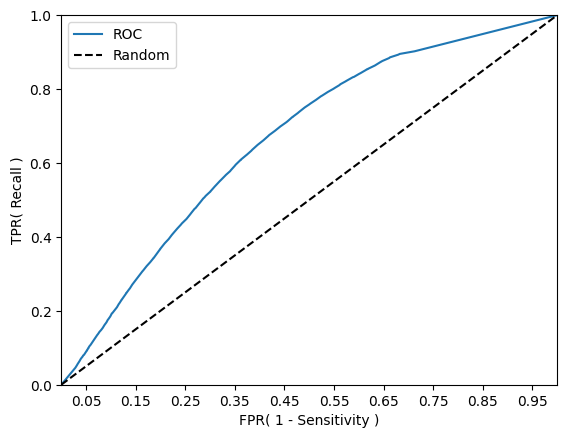

In [ ]:
from matplotlib import pyplot as plt
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(Y_test, model.predict_proba(X_test_selected)[:, 1] )

In [ ]:
#성능 비교군. feature selection 수행 전
model2 = ExtraTreesClassifier(random_state=42)
model2.fit(X_train, Y_train)
print("훈련 세트의 정확도 : {:.2f}".format(model2.score(X_train, Y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(model2.score(X_test, Y_test)))

훈련 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.71


In [ ]:
print("ROC_AUC_SCORE: {:2f}".format(roc_auc_score(Y_test, model2.predict(X_test))))

ROC_AUC_SCORE: 0.561943


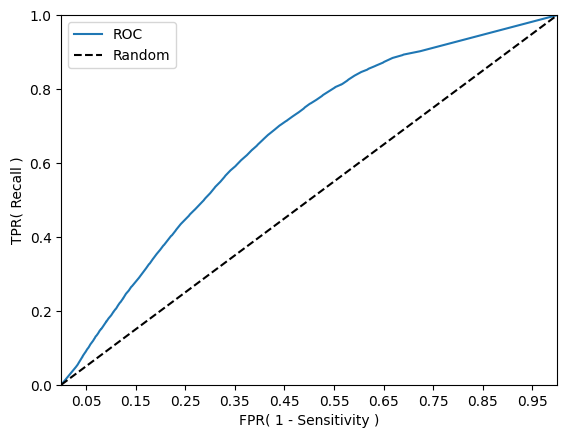

In [ ]:
roc_curve_plot(Y_test, model2.predict_proba(X_test)[:, 1] )

In [ ]:
test = pd.read_csv('data/test.csv')
#test 데이터 전처리
test = dpp.dpp(test)

test = test[selected_features]
print(test.shape)

(90067, 55)


In [ ]:
pred_proba = model.predict_proba(test)[:,1]
pred_proba

array([0.   , 0.005, 0.09 , ..., 0.22 , 0.31 , 0.01 ])

In [ ]:
res = pd.read_csv('data/sample_submission.csv')
res['probability'] = pred_proba
res.to_csv('data/0214baseline_submit2.csv', index=False)